In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [5]:
dataframe = pd.read_csv("Weighted_Average_Interest_Rates_Applied_to_Bank_Loans.csv")

In [6]:
df=dataframe.copy()

In [7]:
df.head(4)

,Unnamed: 0,Date,Personal Finance Credit,Overdraft Account,Auto Credit,Home Credit,Commercial Credit,Commercial Credit (EUR),Commercial Credit (USD),Consumer Credit
0,0,04-01-2013,"13,90","36,85","10,56","9,90","12,62","4,64","4,54","11,99"
1,1,11-01-2013,"14,18","35,36","11,16","9,78","12,02","4,39","4,06","12,02"
2,2,18-01-2013,"14,17","33,73","11,34","9,76","11,94","4,29","4,19","12,09"
3,3,25-01-2013,"13,97","30,01","11,17","9,66","11,62","3,92","4,09","12,07"


In [8]:
df.columns


Index(['Unnamed: 0', 'Date', 'Personal Finance Credit', 'Overdraft Account',
       'Auto Credit', 'Home Credit', 'Commercial Credit',
       'Commercial Credit (EUR)', 'Commercial Credit (USD)',
       'Consumer Credit'],
      dtype='object')

# DATA TEMİZLİĞİ

Öncelikle Data içinden istenmeyen kolonlar drop edilir.inplace=True ile kalıcı hale getirilir.

Data'daki virgüller, nokta ile yer değiştirir.

Data'daki "Date" datetime formatı ile uygun formata çevrilir.

Date_Format kolonu içinden Year ve Month verileri çekilir.

In [43]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [44]:
df["Date_Format"]=df.Date.apply(pd.to_datetime)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9848\490844202.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date_Format"]=df.Date.apply(pd.to_datetime)


In [118]:
df["Personal Finance Credit"]=df["Personal Finance Credit"].replace(",",".")
df["Overdraft Account"]=df["Overdraft Account"].str.replace(",",".")
df["Auto Credit"]=df["Auto Credit"].replace(",",".")
df["Home Credit"]=df["Home Credit"].replace(",",".")
df["Commercial Credit"]=df["Commercial Credit"].replace(",",".")
df["Commercial Credit (EUR)"]=df["Commercial Credit (EUR)"].str.replace(",",".")
df["Commercial Credit (USD)"]=df["Commercial Credit (USD)"].str.replace(",",".")
df["Consumer Credit"]=df["Consumer Credit"].replace(",",".")


In [111]:
df["Year"]= df.Date_Format.dt.year
df["Month"]=df.Date_Format.dt.month

In [119]:
df.head(4)

,Date,Personal Finance Credit,Overdraft Account,Auto Credit,Home Credit,Commercial Credit,Commercial Credit (EUR),Commercial Credit (USD),Consumer Credit,Date_Format,Year,Month,Month_Name
0,04-01-2013,13.90,36.85,10.56,9.90,12.62,4.64,4.54,11.99,2013-04-01,2013,4,Nisan
1,11-01-2013,14.18,35.36,11.16,9.78,12.02,4.39,4.06,12.02,2013-11-01,2013,11,Kasım
2,18-01-2013,14.17,33.73,11.34,9.76,11.94,4.29,4.19,12.09,2013-01-18,2013,1,Ocak
3,25-01-2013,13.97,30.01,11.17,9.66,11.62,3.92,4.09,12.07,2013-01-25,2013,1,Ocak


In [14]:
df["Month"]=df.Month.replace("Ocak",1)
df["Month_Name"]=df["Month"].replace({1:"Ocak",2:"Şubat",3:"Mart",4:"Nisan",5:"Mayıs",6:"Haziran",7:"Temmuz",8:"Ağustos",9:"Eylül",10:"Ekim",11:"Kasım",12:"Aralık"})


In [48]:
df.head(4)

,Date,Personal Finance Credit,Overdraft Account,Auto Credit,Home Credit,Commercial Credit,Commercial Credit (EUR),Commercial Credit (USD),Consumer Credit,Date_Format,Year,Month,Month_Name
0,04-01-2013,13.90,36.85,10.56,9.90,12.62,4.64,4.54,11.99,2013-04-01,2013,4,Nisan
1,11-01-2013,14.18,35.36,11.16,9.78,12.02,4.39,4.06,12.02,2013-11-01,2013,11,Kasım
2,18-01-2013,14.17,33.73,11.34,9.76,11.94,4.29,4.19,12.09,2013-01-18,2013,1,Ocak
3,25-01-2013,13.97,30.01,11.17,9.66,11.62,3.92,4.09,12.07,2013-01-25,2013,1,Ocak


# DATA GÖRSELLEŞTİRME

<Axes: ylabel='Year'>

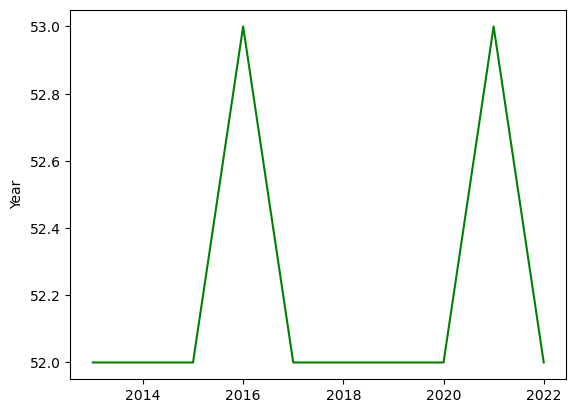

In [49]:
sbn.lineplot(df.Year.value_counts(),color="g")

<Axes: >

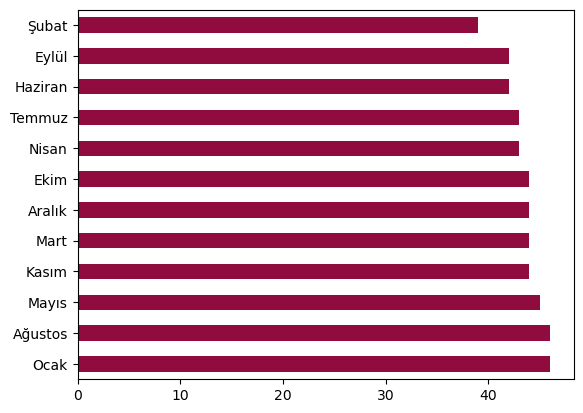

In [50]:
df.Month_Name.value_counts().plot.barh(color="#900C3F")

# Yıllara Göre Ev Kredisi Oranları

Öncelikle "Home Credit" kolonunun dtype'ı float olarak düzeltilir. Bu sayede veriler üzerinde gruplama yapma imkanı sağlanmış olur.

In [ ]:
df["Home Credit"]=df["Home Credit"].astype(float)
df["Home Credit"]

In [28]:
df.groupby('Year')['Home Credit'].describe()
## Yıllara göre Home Credit değerlerinin toplam,ortalama,standart sapma,min ve max değerleri alınır.

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2013,52.0,9.690000,0.843610,8.29,9.0550,9.605,10.5600,11.00
2014,52.0,11.861731,1.058672,10.69,10.9825,11.345,12.9850,13.65
2015,52.0,12.313846,1.328843,10.75,10.9775,12.160,13.8225,14.41
2016,53.0,13.251132,1.144206,11.40,12.0700,13.770,14.2900,14.50
2017,52.0,12.136731,0.843342,10.95,11.4250,11.775,12.9725,13.83
2018,52.0,19.286538,6.356188,11.64,14.4725,14.935,27.5025,29.28
2019,52.0,17.747115,4.545173,12.64,13.0175,17.240,21.3875,27.70
2020,52.0,12.467692,2.637251,9.01,11.2125,11.575,14.8425,18.71
2021,53.0,17.833208,0.354145,16.94,17.7600,17.890,18.0000,18.61


<Axes: title={'center': 'Yıllara Göre Ev Kredisi Oranları'}, xlabel='Year', ylabel='Home Credit'>

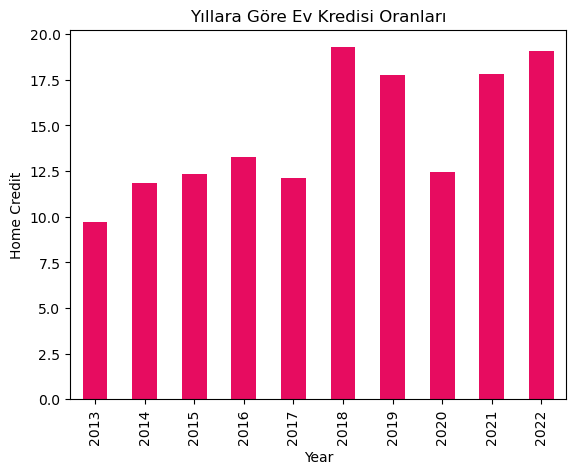

In [38]:
df.groupby('Year')['Home Credit'].mean().plot.bar(color="#E70C60",ylabel="Home Credit",title="Yıllara Göre Ev Kredisi Oranları")
# Elde edilmek istenen veri Yıllara göre Home Credit(Ev Kredisi) ortalamasıdır.

Elde edilen sonuca göre 2018 yılında ev kredisi verileri max seviyededir.2013 yılında ise minimum bir seviyededir.

# Ticari Kredilerin Araba Kredilerine Göre Yıl Bazlı Kıyaslaması

In [40]:
df["Commercial Credit"]=df["Commercial Credit"].astype(float)
df["Auto Credit"]=df["Auto Credit"].astype(float)
## Sağlıklı bir veri elde edebilmek için veriler str formattan float formata çevrilir.

<Axes: xlabel='Year'>

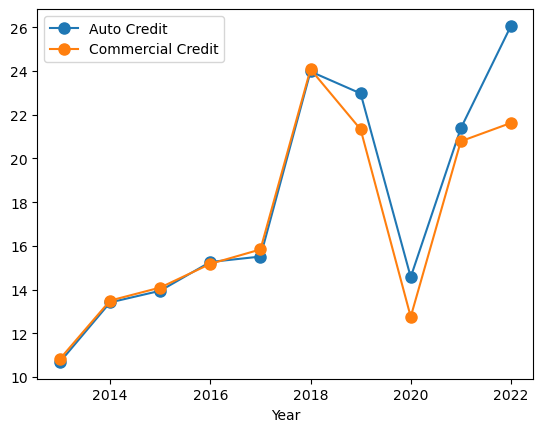

In [107]:
df.groupby("Year").aggregate({"Auto Credit":"mean","Commercial Credit":"mean"}).plot.line(markersize=8,marker='o')

Elde edilen grafikte Araba Kredileri ile Ticari Kredilerin arasında ki makasın ilk defa 2019 yılında açıldığını görmekteyiz.Araba Kredileri 2019 yılından itibaren daima Ticari Kredilerine oranla yüksek olarak ilerlemiştir.

# Tüm Kredi Türlerinin Maksimum Kredi Oranının Yıl Bazlı İncelemesi

In [114]:
df["Personal Finance Credit"]=df["Personal Finance Credit"].astype(float)
df["Consumer Credit"]=df["Consumer Credit"].astype(float)

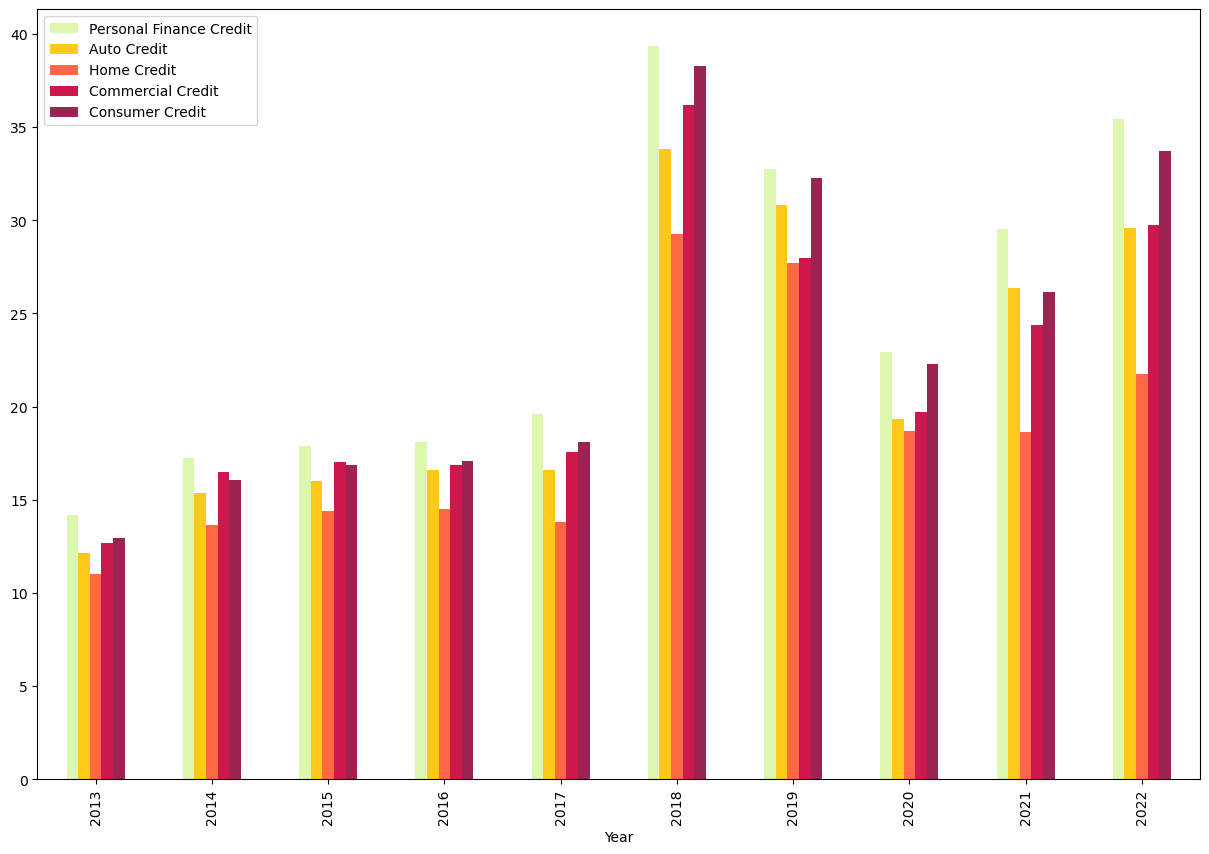

In [290]:
year_month_creditrates= df.groupby(["Year"])[["Personal Finance Credit","Overdraft Account","Auto Credit","Home Credit","Commercial Credit","Consumer Credit"]].max().plot.bar(alpha=0.9,lw=80,figsize=(15,10),color=(["#DAF7A6","#FFC300","#FF5733","#C70039","#900C3F","#581845"]))

Yıllara bakıldığında tüm kredi oranlarının max değelerine göre bir değerlendirme yaparsak, krediler arasında oran genel düzeyde korunmuştur. Yıllara göre olan değişiklikler tüm kredileri aynı oranda etkilemiştir.